### 데이터사이언스

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'autofeat'

In [5]:
train_data = pd.read_csv('datas/train.csv')
test_data = pd.read_csv('datas/test.csv')

In [16]:
# 데이터프레임 기본 정보 확인
train_data.info()

# 데이터프레임의 첫 5행 출력
train_data.head()

# 열별 분석
for i in range(28):  # 열의 개수가 28개인 경우
    column_name = train_data.columns[i]
    print(f"\n--- 열: {column_name} ---")
    
    # 열의 값 분포 확인
    print("항목별 개수:")
    print(train_data.iloc[:, i].value_counts())
    
    # 열의 기본 통계량 출력 (숫자형인 경우)
    if train_data.iloc[:, i].dtype in ['int64', 'float64']:
        print("\n기본 통계분석:")
        print(train_data.iloc[:, i].describe())
    
    # 결측치 여부 확인
    missing_values = train_data.iloc[:, i].isnull().sum()
    print(f"\n결측치 개수: {missing_values}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

In [18]:
#라벨링 잔뜩

from sklearn.preprocessing import LabelEncoder

# 1. 라벨 인코딩할 열들 지정
label_cols = ['Card Brand', 'Card Type', 'Error Message', 'Is Fraud?']

# 2. 각 열에 대해 라벨 인코딩 수행
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le  # 나중에 필요하면 인코더 저장 (복원할 때 사용 가능)

# 3. 날짜 데이터를 8자리 숫자로 변환
# 'Expires' 변환 (MM/YYYY -> YYYYMMDD)
train_data['Expires'] = train_data['Expires'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')

# 'Acct Open Date' 변환 (MM/YYYY -> YYYYMMDD)
train_data['Acct Open Date'] = train_data['Acct Open Date'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')

# 날짜 형식을 int 타입으로 변환
train_data['Expires'] = train_data['Expires'].astype(int)
train_data['Acct Open Date'] = train_data['Acct Open Date'].astype(int)

# 결과 확인
print(train_data.info())
print(train_data.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

In [22]:
# 상관관계 계산
correlation_matrix = train_data.corr()

# 상관관계 결과를 CSV로 저장
correlation_csv_path = 'datas/파생/correlation_matrix.csv'
correlation_matrix.to_csv(correlation_csv_path)

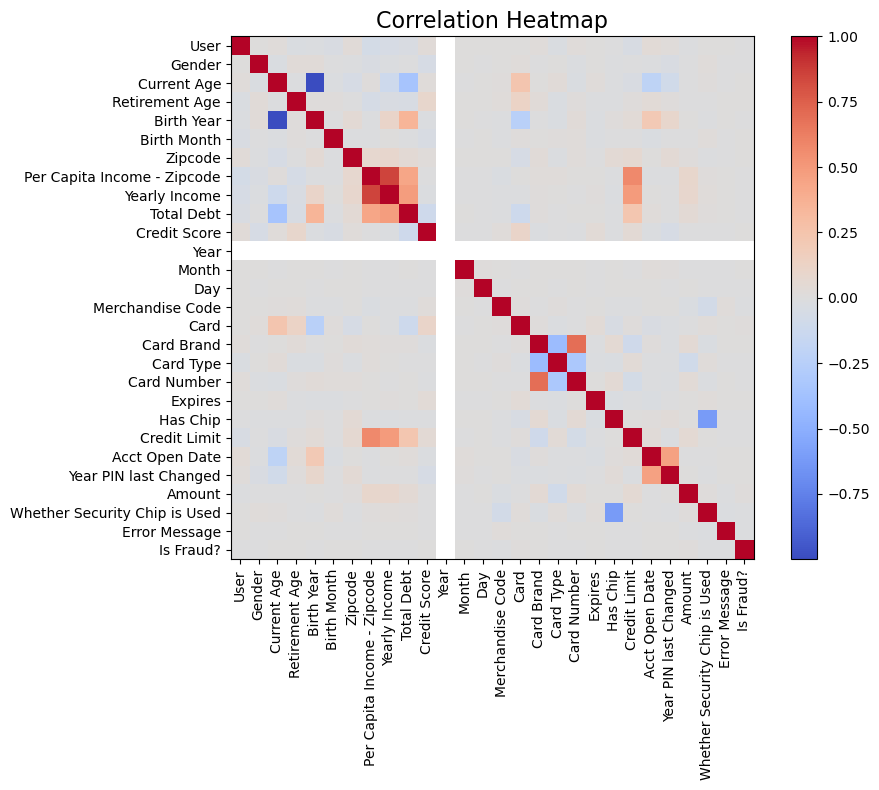

In [24]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap", fontsize=16)
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(heatmap)
plt.xticks(np.arange(28), labels=correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(28), labels=correlation_matrix.columns)

plt.tight_layout()
plt.show()

In [17]:
from autofeat import AutoFeatRegressor

# 모델과 자동 피처 생성기 초기화
afreg = AutoFeatRegressor()

# X는 입력 데이터, y는 타겟 값
X_new = afreg.fit_transform(train_data.drop(columns=['Is Fraud?']), train_data['Is Fraud?'])

# 새로 생성된 피처 확인
print(X_new.head())


ValueError: Input contains NaN